In [253]:
import pandas as pd 
import json

In [254]:
path_to_iota_data = "../node-app/iota_data.csv"
path_to_node_data = "../node-app/node_data.csv"

df_iota = pd.read_csv(path_to_iota_data)
df_node = pd.read_csv(path_to_node_data)

In [255]:
df_iota

,datetime,auth_node,sub_node,same_auth_sub,local_pow,timeToSync,timeToReceiveMessage,packet_size_bytes
0,1648231786593,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,294,16901,2000
1,1648231806178,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,123,19405,2000
2,1648231811001,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,116,4653,2000
3,1648231818054,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,116,6886,2000
4,1648232809052,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,280,1346,2
...,...,...,...,...,...,...,...,...
203,1648591293803,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,77,2630,32
204,1648591294584,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,92,638,32
205,1648591295949,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,121,1186,32
206,1648591304674,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,136,8457,32


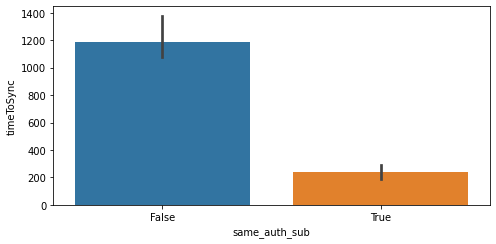

In [256]:
import seaborn as sns
# who v/s fare barplot
 
sns.barplot(x = 'same_auth_sub',
            y = 'timeToSync',
            data = df_iota)
 
# Show the plot
plt.show()

In [249]:
df_iota_small = df_iota[df_iota['packet_size_bytes'] < 100] 
df_iota_small

,datetime,auth_node,sub_node,same_auth_sub,local_pow,timeToSync,timeToReceiveMessage,packet_size_bytes
4,1648232809052,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,280,1346,2
5,1648232815537,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,103,6326,2
6,1648232818560,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,121,2843,2
7,1648232819169,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,114,442,2
8,1648232825017,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,122,5667,2
...,...,...,...,...,...,...,...,...
203,1648591293803,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,77,2630,32
204,1648591294584,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,92,638,32
205,1648591295949,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,121,1186,32
206,1648591304674,http://54.177.214.21:14265,http://54.177.214.21:14265,True,False,136,8457,32


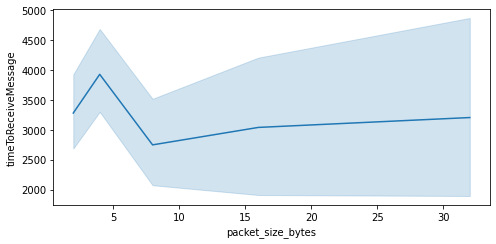

In [250]:
import seaborn as sns
# who v/s fare barplot
 
sns.lineplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_iota_small)
 
# Show the plot
plt.show()

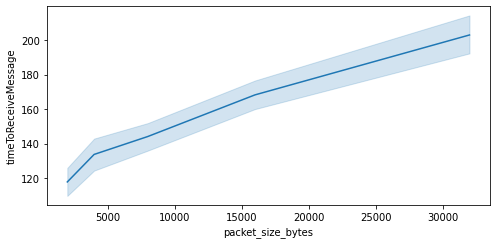

In [251]:
fig, ax = plt.subplots()

ax1 = sns.lineplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_node)

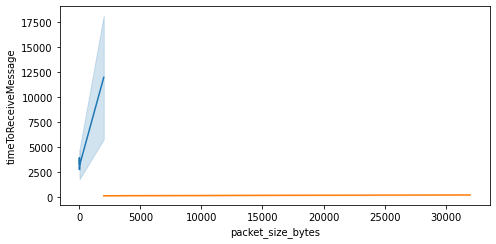

In [252]:
fig, ax = plt.subplots()

ax = sns.lineplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_iota)

ax1 = sns.lineplot(x = 'packet_size_bytes',
            y = 'timeToReceiveMessage',
            data = df_node)

In [223]:
df_node_grouped = df_node.groupby("packet_size_bytes").mean()

In [218]:
df_iota_grouped = df_iota.groupby("packet_size_bytes").mean()
df_iota_grouped = df_iota_grouped.drop(columns=['same_auth_sub', 'local_pow', 'datetime'])
df_iota_grouped

,timeToSync,timeToReceiveMessage
packet_size_bytes,,
2,908.700000,4280.700000
4,787.592593,5037.814815
2000,162.250000,11961.250000
